# Finance Data Science Project

**In this data project I will focus on exploratory data analysis of stock prices.**

## Getting the Data

I will first make necessary imports and get the stocks data for various banks from yahoo finance. I will analyze the data from the year 2006 to 2016. Aim is to analyze the stock price data in the time of financial crisis

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [3]:
# Bank of America
BAC=pd.read_csv("BAC.csv",index_col=0)

In [4]:
BAC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,34.280807,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,33.916729,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,33.960411,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,33.909451,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,33.931290,15619400


In [5]:
#CitiGroup
C=pd.read_csv("C.csv",index_col=0)

#Goldman Sachs
GS=pd.read_csv("GS.csv",index_col=0)

#JP Morgan Chase
JPM=pd.read_csv("JPM.csv",index_col=0)

#Morgan Stanely
MS=pd.read_csv("MS.csv",index_col=0)

#Wells Fargo
WFC=pd.read_csv("WFC.csv",index_col=0)

In [6]:
C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,490.000000,493.799988,481.100006,492.899994,373.704346,1537600
2006-01-04,488.600006,491.000000,483.500000,483.799988,366.804901,1870960
2006-01-05,484.399994,487.799988,484.000000,486.200012,368.624603,1143160
2006-01-06,488.799988,489.000000,482.000000,486.200012,368.624603,1370210
2006-01-09,486.000000,487.399994,483.000000,483.899994,366.880768,1680740
...,...,...,...,...,...,...
2015-12-24,52.480000,52.970001,52.450001,52.709999,46.350540,4671200
2015-12-28,52.570000,52.570000,51.959999,52.380001,46.060364,8761700
2015-12-29,52.759998,53.220001,52.740002,52.980000,46.587975,10155100


In [7]:
#will make a list now
indexing=['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Made a list of the banks (as strings)**

In [8]:
#Multi-level indexed data will help us to better analyze and compare the data together 
bank_stocks= pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=indexing)

** Using the pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. I will set the keys argument equal to the list indexing. Axis will be equal to 1 as we will be merging columns.**

In [9]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  34.280807  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  33.916729  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  33.960411  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  33.909451  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  33.931290  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  36.631054  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  36.656166  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  36.756695  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  36.794384  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  37.183868  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  20.613142  11016400  
2006-01-04  31.530001  20.374050  10870000  
2006-01-05  31.495001  20.351437  10158000  
2006-01-06  31.680000  20.470978   8403800  
2006-01-09  31.674999  20.467749   5619600  

[5 rows x 36 columns]

** Now I will set the column name levels**

In [10]:
bank_stocks.columns.names = ['Bank Symbols','Stock Info']

** Checking the head of the bank_stocks again to dataframe.**

In [11]:
bank_stocks.head()

Bank Symbols        BAC                                                        \
Stock Info         Open       High        Low      Close  Adj Close    Volume   
Date                                                                            
2006-01-03    46.919998  47.180000  46.150002  47.080002  34.280807  16296700   
2006-01-04    47.000000  47.240002  46.450001  46.580002  33.916729  17757900   
2006-01-05    46.580002  46.830002  46.320000  46.639999  33.960411  14970700   
2006-01-06    46.799999  46.910000  46.349998  46.570000  33.909451  12599800   
2006-01-09    46.720001  46.970001  46.360001  46.599998  33.931290  15619400   

Bank Symbols           C                                      ...         MS  \
Stock Info          Open        High         Low       Close  ...        Low   
Date                                                          ...              
2006-01-03    490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04    488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05    484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06    488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09    486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Symbols                                       WFC                        \
Stock Info        Close  Adj Close   Volume       Open       High        Low   
Date                                                                           
2006-01-03    58.310001  36.631054  5377000  31.600000  31.975000  31.195000   
2006-01-04    58.349998  36.656166  7977800  31.799999  31.820000  31.365000   
2006-01-05    58.509998  36.756695  5778000  31.500000  31.555000  31.309999   
2006-01-06    58.570000  36.794384  6889800  31.580000  31.775000  31.385000   
2006-01-09    59.189999  37.183868  4144500  31.674999  31.825001  31.555000   

Bank Symbols                                  
Stock Info        Close  Adj Close    Volume  
Date                                          
2006-01-03    31.900000  20.613142  11016400  
2006-01-04    31.530001  20.374050  10870000  
2006-01-05    31.495001  20.351437  10158000  
2006-01-06    31.680000  20.470978   8403800  
2006-01-09    31.674999  20.467749   5619600  

[5 rows x 36 columns]

# Exploratory Data Analysis

I will explore the data a bit now! Will make the use of python libraries.

**First I will find out the max close price for each bank's stock throughout this time period**

In [12]:
#method 1
for i in indexing:
    print(i,bank_stocks[i]['Close'].max())

BAC 54.900002
C 564.099976
GS 247.919998
JPM 70.08000200000001
MS 89.300003
WFC 58.52


In [13]:
#method2 using cross-section method
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()


Bank Symbols
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Now I will create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are basically the percentage change in stock as compared to previous day**

In [14]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [15]:
for i in indexing:
    returns[i+' Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Now I will create a pairplot using seaborn of the returns dataframe. Any unsual graph there?**

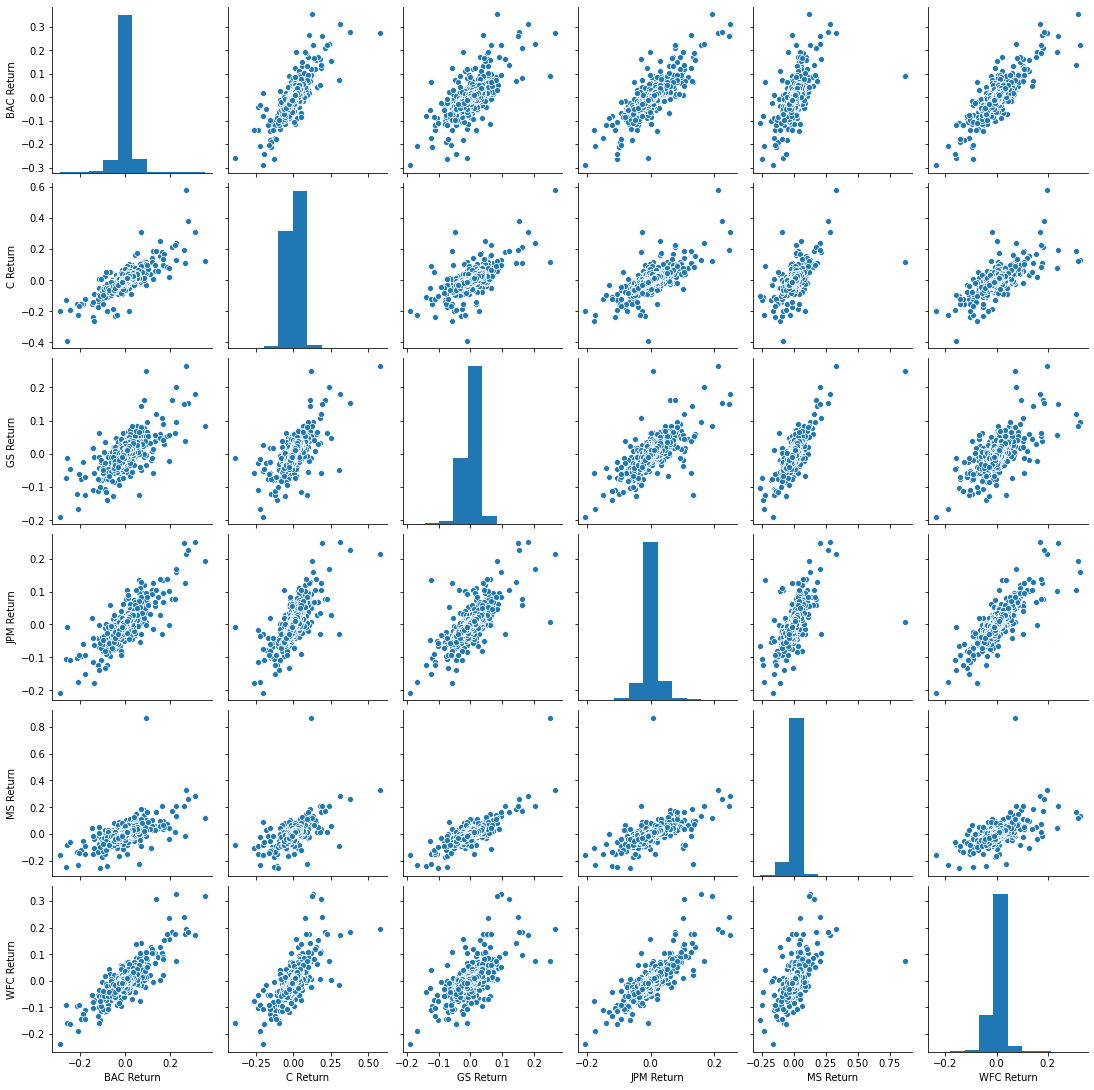

In [16]:
#returns[1:] because returns[0] is NaN
sns.pairplot(returns[1:])

I will now check for any unusual figure from the above graphs, if nothing is found I will further analyze data

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
# Worst Drop 
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

Interesting to note here 4 of the 6 banks have their worst return on the same day that is 20th Jan 2009

In [18]:
# Best Single Day Gain
returns.idxmax()

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

**I have noticed that JP Morgan's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

In [19]:
returns.max()

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

20th Jan 2009 was barack obama's inaugartion day due to which the WS plunged

**Now I will look at the standard deviation of the returns and accordingly will classify stocks as the riskiest over the entire time period**

In [20]:
# Very similar risk profiles that is the volatility, but Citigroup is highest
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [21]:
returns.loc['2015-01-01':'2015-12-31'].std() 
#Well Fargos has the lowest volatility for 2015 year

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return'>

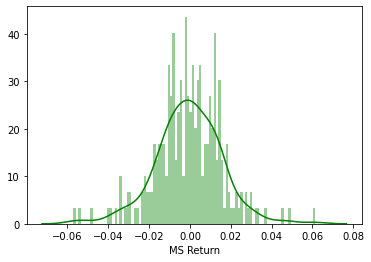

In [22]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return'>

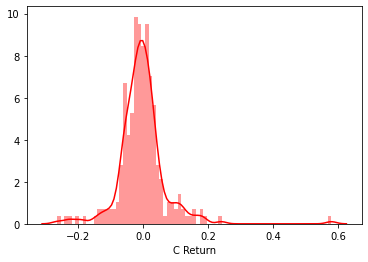

In [23]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=75)

A lot of this project will focus on visualizations. I am going to use my preferred visualization libraries.

In [24]:
sns.set_style('whitegrid')

# Some additional imports 
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



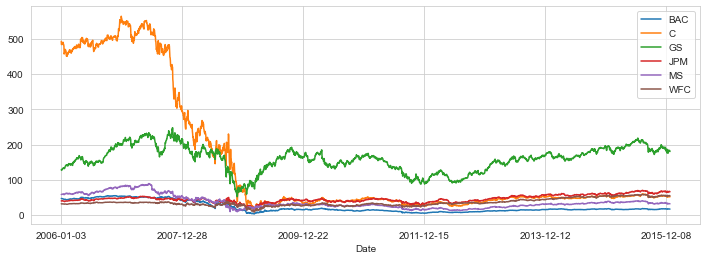

In [25]:
#Method 1
for i in indexing:
    bank_stocks[i]['Close'].plot(label=i,figsize=(12,4))
plt.legend()

C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='Date'>

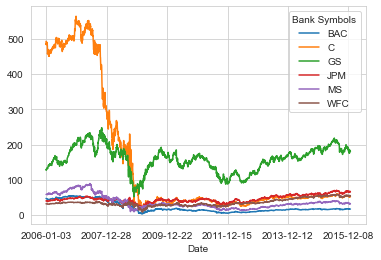

In [26]:
#method 2
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [27]:
# Using Plotly we can do the same thing and it will give us better visualization
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Now I will analyze the moving averages for these stocks in the year 2008. 

C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



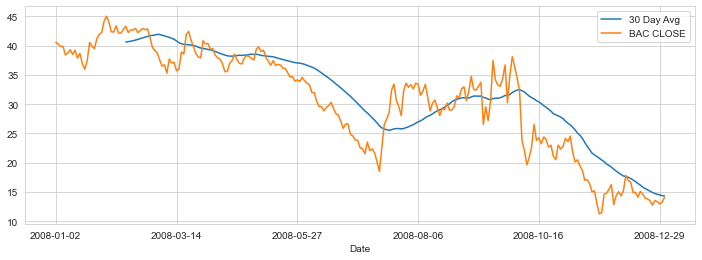

In [28]:
#Plotting the 30 day rolling average against the Close Price for Bank Of America's stock for the year 2008**
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Symbols', ylabel='Bank Symbols'>

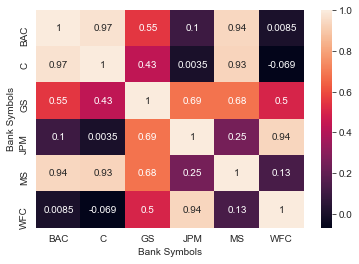

In [29]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

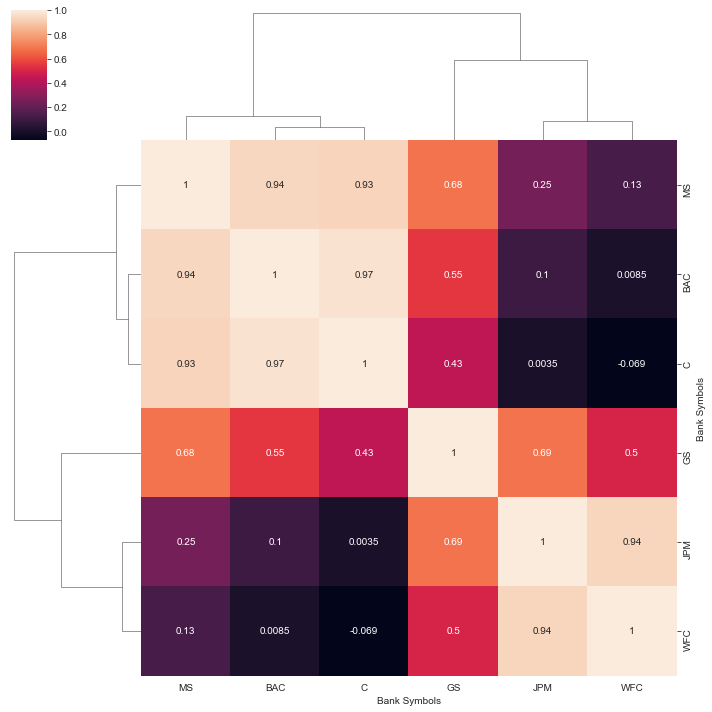

In [30]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [31]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

**In this part of the project I will rely on the cufflinks library to create some Technical Analysis plots.**

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [32]:
#It is like a matrix 
close_corr

Bank Symbols,BAC,C,GS,JPM,MS,WFC
Bank Symbols,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


In [33]:
bac15=BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

In [34]:
#Candle Stick plot for Bank of America
bac15.iplot(kind='candle')

In [35]:
close_corr.iplot(kind='heatmap',colorscale= 'rdbu')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [36]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [37]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')